# <center>MNIST Digit Recognizer</center>

## Problem Statement
A classic problem in the field of pattern recognition is that of **handwritten digit recognition. ** <br>
Have to build model using Support Vector Machine to predict digit.
 
## Goal
<ul>
    <li>Build Supervised Learning model using SVC algorithm.</li>
    <li>Correctly identify digit written in image.</li>
</ul>

### Load Libraries & Data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

In [67]:
pd.set_option('display.max_column', 100)

In [68]:
trainDf = pd.read_csv("train.csv")

In [69]:
trainDf.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Data Analysis

In [70]:
trainDf.shape

(42000, 785)

In [71]:
trainDf.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.00000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00300,0.011190,0.005143,0.000214,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,0.129571,0.174119,0.191310,0.190595,0.196048,0.171357,0.164476,0.151714,0.105310,0.060786,0.045071,...,0.503095,1.146333,2.161786,3.243452,4.637214,5.979500,6.605095,6.443595,5.681095,4.656952,3.772524,2.748905,1.796452,1.089905,0.563190,0.239571,0.093524,0.024833,0.000857,0.001405,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006143,0.035833,0.082357,0.114905,0.178714,0.301452,0.413643,0.513667,0.558833,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.56812,1.626927,1.053972,0.043916,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,4.992894,5.810949,5.995212,5.910242,6.024478,5.726352,5.515774,5.436431,4.478486,3.457538,2.933291,...,9.617457,14.813496,20.680863,25.122322,30.096075,34.136445,35.807719,35.121494,33.020299,29.711767,26.957829,22.879248,18.595109,14.434439,10.517823,6.469315,3.976306,1.846016,0.139556,0.287891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.949803,2.350859,3.934280,4.543583,5.856772,7.219742,8.928286,10.004069,10.129595,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [72]:
trainDf.isnull().sum()[trainDf.isnull().sum() > 0]

Series([], dtype: int64)

In [73]:
trainDf[trainDf.duplicated()]

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783


No Missing value<BR>
No duplicate rows

In [74]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


### EDA

**Display Digit Images**

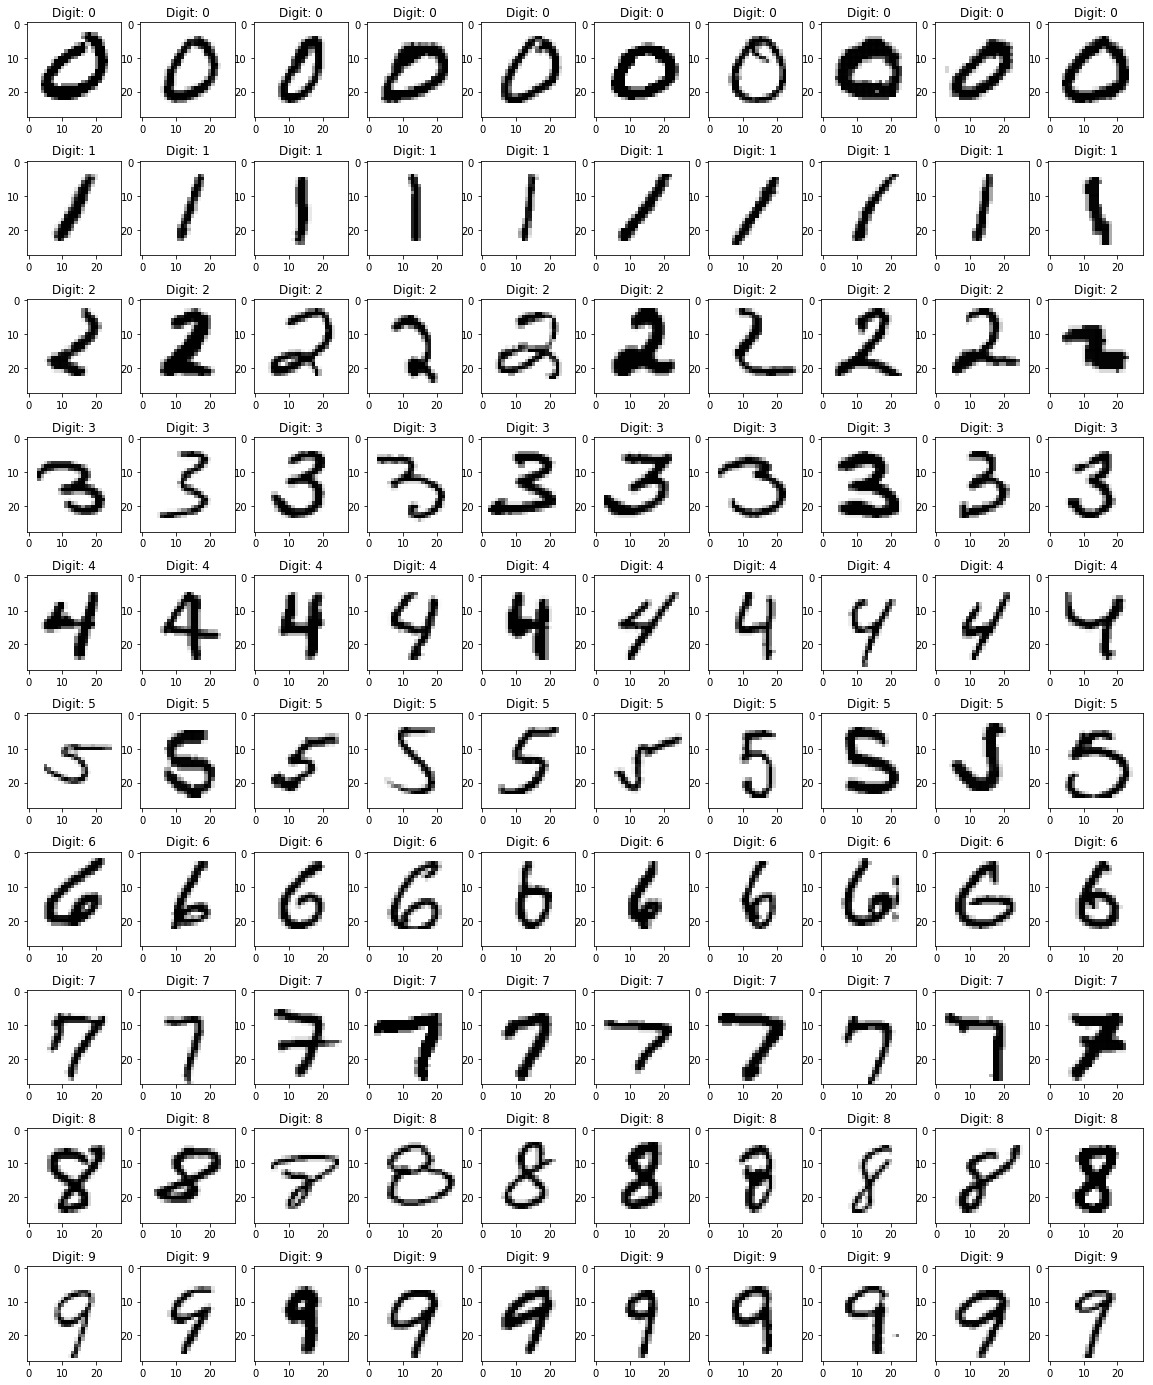

In [75]:
plt.figure(figsize=(20,25))
imgCount = 1
for d in range(0,10):
    for i, row in trainDf[trainDf['label'] == d].sample(10).iterrows():
        img = np.array(row)[1:]
        label = row[0]

        plottable_image = np.reshape(img, (28, 28))

        # Plot the image
        plt.subplot(10,10, imgCount)
        plt.imshow(plottable_image, cmap='gray_r')
        plt.title('Digit: {}'.format(label))
        imgCount = imgCount + 1

plt.show()

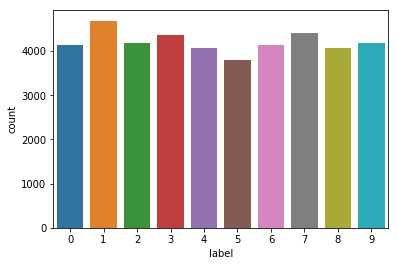

In [76]:
sns.countplot(data=trainDf, x='label')
plt.show()

Dataset is balanced, each category have approx similar number of observation in data set. 

## Model Building

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
Y = trainDf["label"]
X = trainDf.drop(columns=['label'], axis=1)

In [79]:
#Split data in Train & Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.2, stratify=Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


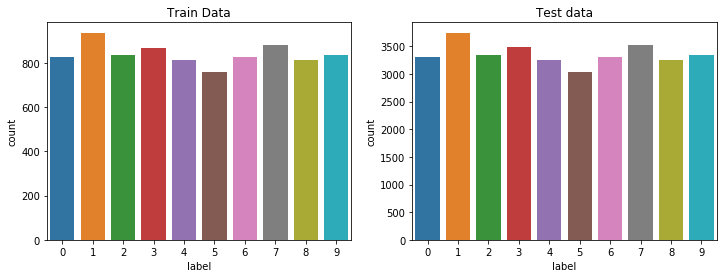

In [80]:
# Check train & test data is balanced or not
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
sns.countplot(x=Y_train)
plt.title('Train Data')

plt.subplot(1,2,2)
plt.title('Test data')
sns.countplot(x=Y_test)

plt.show()

In [81]:
#Scale data using StandardScaler
sc = StandardScaler()
scalledData = sc.fit_transform(X_train)
trainDf_scalled = pd.DataFrame(data=scalledData, columns=X_train.columns)
trainDf_scalled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.0314

In [82]:
testDf_scalled = pd.DataFrame(data=sc.transform(X_test), columns=X_test.columns)
testDf_scalled.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.031417,-0.024279,-0.027736,-0.025113,-0.018802,-0.01205,-0.010912,0.0,...,-0.048635,-0.074556,-0.096304,-0.119644,-0.154141,-0.178435,-0.191268,-0.188148,-0.168143,-0.151655,-0.139139,-0.126253,-0.09969,-0.075996,-0.048998,-0.038041,-0.030955,-0.022277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,-0.013339,-0.026458,-0.048148,-0.056969,-0.057059,-0.057152,-0.059321,-0.053779,-0.039764,-0.031571,-0.031614,-0.026342,-0.021898,-0.013819,-0.010912,-0.010912,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.010912,-0.010912,0.0,-0.010912,-0.010912,-0.016008,-0.024197,-0.025144,-0.033098,-0.034216,-0.0314

Here we have **784** feature variable, mnual feature selection is not possible on this data set.<BR>
Will use **PCA** to reduce dimession of data set.

In [83]:
pca = PCA(svd_solver='randomized', random_state=100)
pca.fit(trainDf_scalled)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=100,
  svd_solver='randomized', tol=0.0, whiten=False)

In [84]:
pca.components_.shape

(784, 784)

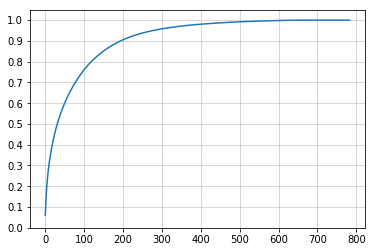

In [85]:
#Plot cumulative sum of variance explained by princepal component
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.yticks(np.arange(0,1.1,0.1))
plt.grid( linestyle='-', linewidth=0.5)
plt.show()

In [86]:
np.cumsum(pca.explained_variance_ratio_)[[100,200,300,400,500,600,700]]

array([0.76148422, 0.90536203, 0.95813609, 0.98042963, 0.99187313,
       0.99815059, 1.        ])

**90%** varaince explained by **200** PC<BR>
**96%** varaince explained by **300** PC<BR>
**98%** varaince explained by **400** PC<BR>
So, we can choose **300 Or 400** PC for model building.

In [87]:
from sklearn.decomposition import IncrementalPCA
final_pca = IncrementalPCA(n_components=300)
trainDf_pca = final_pca.fit_transform(trainDf_scalled)
testDf_pca = final_pca.transform(testDf_scalled)

In [88]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param = {'C' : [0.01, 0.1, 1, 10]}
svc = SVC(kernel='linear')
model_scv_li = GridSearchCV(svc,
                             param_grid=param, 
                             scoring='accuracy', 
                             cv=folds, 
                             verbose=1,
                             n_jobs = -1,
                             return_train_score=True)
model_scv_li.fit(trainDf_pca, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:  1.7min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score=True, scoring='accuracy', verbose=1)

In [89]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param = {'C' : [0.01, 0.1, 1, 10],
        'gamma': [0.01, 0.1, 1]}
svc = SVC(kernel = 'poly')
model_scv_poly = GridSearchCV(svc,
                             param_grid=param, 
                             scoring='accuracy', 
                             cv=folds, 
                             verbose=1,
                             n_jobs = -1,
                             return_train_score=True)
model_scv_poly.fit(trainDf_pca, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  9.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.1, 1, 10], 'gamma': [0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [90]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)
param = {'C' : [0.1, 1, 10, 100],
        'gamma': [0.1, 0.01, 0.001]}
svc = SVC(kernel = 'rbf')
model_scv_rbf = GridSearchCV(svc,
                             param_grid=param, 
                             scoring='accuracy', 
                             cv=folds, 
                             verbose=1,
                             n_jobs = -1,
                             return_train_score=True)
model_scv_rbf.fit(trainDf_pca, Y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 12.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 17.2min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [91]:
liDF = pd.DataFrame(data = model_scv_li.cv_results_)
polyDF = pd.DataFrame(data = model_scv_poly.cv_results_)
rbfDF = pd.DataFrame(data = model_scv_rbf.cv_results_)

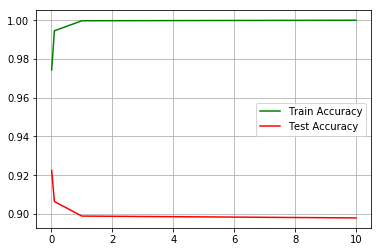

In [92]:
#Plot Train and Test score for different parameter value of C
#Kernal = 'linear'
plt.plot(liDF['param_C'], liDF['mean_train_score'], 'g')
plt.plot(liDF['param_C'], liDF['mean_test_score'], 'r')
plt.legend(['Train Accuracy', 'Test Accuracy'])
plt.grid()
plt.show()

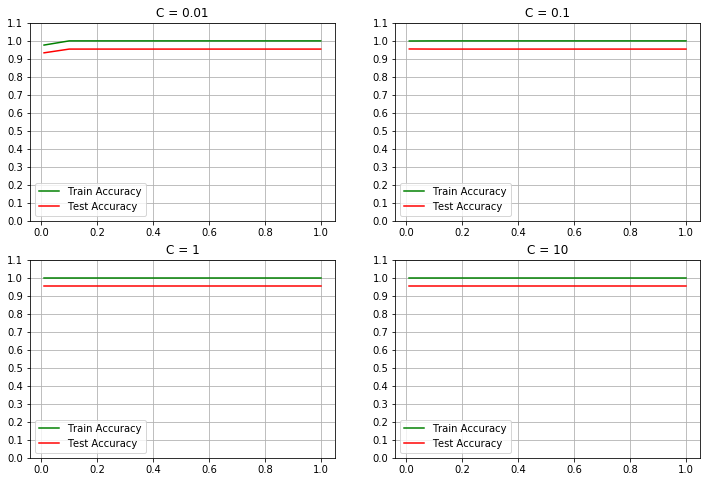

In [103]:
#Kernal = 'Poly'
plt.figure(figsize=(12,8))
for i,c in enumerate(np.unique(polyDF['param_C'])) :
    tempDF = polyDF[polyDF['param_C'] == c]
    plt.subplot(2,2, i+1)
    plt.plot(tempDF['param_gamma'], tempDF['mean_train_score'], 'g')
    plt.plot(tempDF['param_gamma'], tempDF['mean_test_score'], 'r')
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    plt.title("C = {}".format(c))
    plt.legend(['Train Accuracy', 'Test Accuracy'])
    plt.grid()
plt.show()

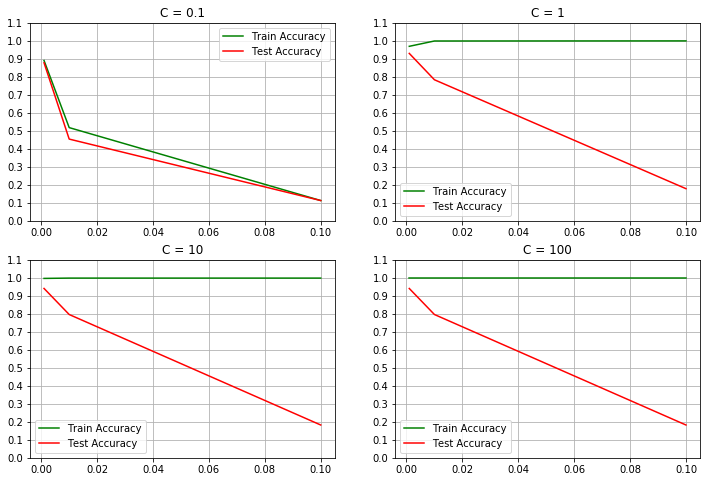

In [104]:
#Kernal = 'RBF'
plt.figure(figsize=(12,8))
for i,c in enumerate(np.unique(rbfDF['param_C'])) :
    tempDF = rbfDF[rbfDF['param_C'] == c]
    plt.subplot(2,2, i+1)
    plt.plot(tempDF['param_gamma'], tempDF['mean_train_score'], 'g')
    plt.plot(tempDF['param_gamma'], tempDF['mean_test_score'], 'r')
    plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1])
    plt.title("C = {}".format(c))
    plt.legend(['Train Accuracy', 'Test Accuracy'])
    plt.grid()
plt.show()

In [95]:
print("Linear Model best Score : {} for Parameter : {}".format(model_scv_li.best_score_, model_scv_li.best_params_))
print("Non Linear Model (Kernal = Poly) best Score : {} for Parameter : {}".format(model_scv_poly.best_score_, model_scv_poly.best_params_))
print("Non Linear Model (Kernal = RBF) best Score : {} for Parameter : {}".format(model_scv_rbf.best_score_, model_scv_rbf.best_params_))

Linear Model best Score : 0.9225 for Parameter : {'C': 0.01}
Non Linear Model (Kernal = Poly) best Score : 0.955 for Parameter : {'C': 0.1, 'gamma': 0.01}
Non Linear Model (Kernal = RBF) best Score : 0.9423809523809524 for Parameter : {'C': 10, 'gamma': 0.001}


In [105]:
li_model = SVC(kernel='linear', C = 0.01)
li_model.fit(trainDf_pca, Y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [106]:
poly_model = SVC(kernel='poly', C = 0.1, gamma = 0.01)
poly_model.fit(trainDf_pca, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [107]:
rbf_model = SVC(kernel='rbf', C = 10, gamma = 0.001)
rbf_model.fit(trainDf_pca, Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

### Model Evaluation

In [108]:
y_train_pred = li_model.predict(trainDf_pca)
y_test_pred = li_model.predict(testDf_pca)
print("Linear : Train Accuracy : {}".format(metrics.accuracy_score(Y_train, y_train_pred)))
print("Linear : Test Accuracy : {}".format(metrics.accuracy_score(Y_test, y_test_pred)))

Linear : Train Accuracy : 0.9716666666666667
Linear : Test Accuracy : 0.9257440476190476


In [109]:
y_train_pred = poly_model.predict(trainDf_pca)
y_test_pred = poly_model.predict(testDf_pca)
print("Poly : Train Accuracy : {}".format(metrics.accuracy_score(Y_train, y_train_pred)))
print("Poly : Test Accuracy : {}".format(metrics.accuracy_score(Y_test, y_test_pred)))

Poly : Train Accuracy : 0.9994047619047619
Poly : Test Accuracy : 0.9550595238095239


In [110]:
y_train_pred = rbf_model.predict(trainDf_pca)
y_test_pred = rbf_model.predict(testDf_pca)
print("RBF : Train Accuracy : {}".format(metrics.accuracy_score(Y_train, y_train_pred)))
print("RBF : Test Accuracy : {}".format(metrics.accuracy_score(Y_test, y_test_pred)))

RBF : Train Accuracy : 0.9979761904761905
RBF : Test Accuracy : 0.945


SVC model with kernal RBF & Poly have good accuracy.<BR>
RBF kernal creates more compelx model than poly.<BR>
**Poly** kernal have **~96%** of accuracy on test data (80% of whole data set) which is slightly higher than RBF  which indicates poly kernal generate a good and less complex model than RBF.